# Lab | Cleaning numerical data

## 1. Import the necessary libraries.

In [1]:
import pandas as pd
import cleaning_functions as functions
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Load the customer_value_analysis.csv into the variable customer_df

In [2]:
customer_df = pd.read_csv('./files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv')

## 3. First look at its main features (head, shape, info).

In [3]:
customer_df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [4]:
customer_df.shape

(9134, 24)

In [5]:
customer_df.info

<bound method DataFrame.info of      Customer       State  Customer Lifetime Value Response  Coverage  \
0     BU79786  Washington              2763.519279       No     Basic   
1     QZ44356     Arizona              6979.535903       No  Extended   
2     AI49188      Nevada             12887.431650       No   Premium   
3     WW63253  California              7645.861827       No     Basic   
4     HB64268  Washington              2813.692575       No     Basic   
...       ...         ...                      ...      ...       ...   
9129  LA72316  California             23405.987980       No     Basic   
9130  PK87824  California              3096.511217      Yes  Extended   
9131  TD14365  California              8163.890428       No  Extended   
9132  UP19263  California              7524.442436       No  Extended   
9133  Y167826  California              2611.836866       No  Extended   

     Education Effective To Date EmploymentStatus Gender  Income  ...  \
0     Bachelor    

## 4. Rename the columns so they follow the PE8 (snake case: lowecase_with_underscores)

In [6]:
customer_df = functions.standardize_column_names(customer_df)
customer_df.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


## 5. Change the type of effective_to_date column to DateTime format

In [7]:
customer_df.dtypes

customer                          object
state                             object
customer_lifetime_value          float64
response                          object
coverage                          object
education                         object
effective_to_date                 object
employmentstatus                  object
gender                            object
income                             int64
location_code                     object
marital_status                    object
monthly_premium_auto               int64
months_since_last_claim            int64
months_since_policy_inception      int64
number_of_open_complaints          int64
number_of_policies                 int64
policy_type                       object
policy                            object
renew_offer_type                  object
sales_channel                     object
total_claim_amount               float64
vehicle_class                     object
vehicle_size                      object
dtype: object

In [8]:
customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'], errors='coerce')
customer_df.dtypes

customer                                 object
state                                    object
customer_lifetime_value                 float64
response                                 object
coverage                                 object
education                                object
effective_to_date                datetime64[ns]
employmentstatus                         object
gender                                   object
income                                    int64
location_code                            object
marital_status                           object
monthly_premium_auto                      int64
months_since_last_claim                   int64
months_since_policy_inception             int64
number_of_open_complaints                 int64
number_of_policies                        int64
policy_type                              object
policy                                   object
renew_offer_type                         object
sales_channel                           

## 6. Check NaN values per column

In [9]:
customer_df.isnull().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

## 7. Define a function that given an input dataframe, returns two dataframes: one with numerical columns and another with categorical columns of the input dataframe

In [10]:
def numerical_categorical(df: pd.DataFrame):
    numerical = df.select_dtypes(include=np.number)
    categorical = df.select_dtypes(include=object)
    return numerical, categorical

In [11]:
numerical, categorical = numerical_categorical(customer_df)
display(numerical.head())
categorical.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


## 8. Drop any ID column

In [12]:
categorical.drop('customer', axis=1, inplace=True)

## 9. Get the correlation matrix for the numerical variables. What is the pair of numerical variables that have the highest correlation? It makes sense, why?

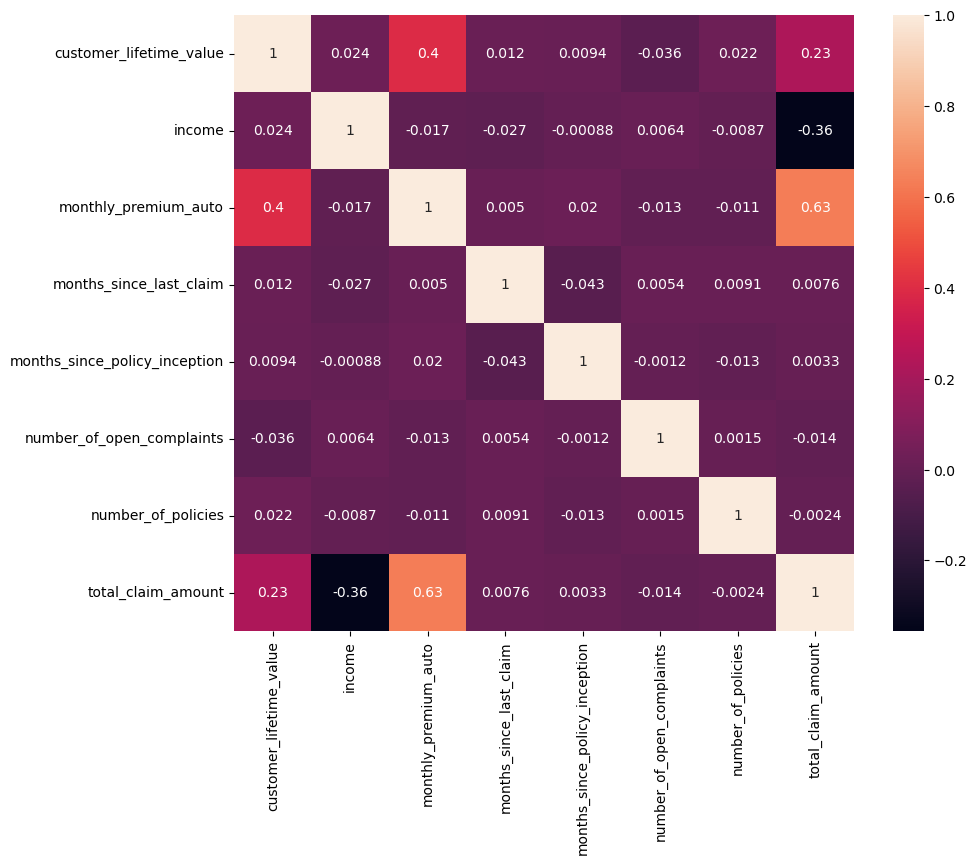

In [13]:
corr_matrix=numerical.corr(method='pearson')
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

The pair of numerical variables that have the highest correlation is total_claim_amount with monthly_premium_auto. This makes sense because the higher the monthly premium auto, the higher amount they will have to pay.

## 10. Define a function that takes a pandas DataFrame as an input and returns two pandas DataFrames: the first containing numerical continuous columns and the second containing numerical discrete columns of the input dataframe. To this end, it might be helpful to count the number of unique values. The function must have an optional argument set by default to 36 to discriminate between continuous and discrete columns. Then, use it to create two new dataframes: continuous_df and discrete_df

In [14]:
def continuous_discrete(df:pd.DataFrame, threshold = 36):
    
    continuous_df = pd.DataFrame()
    discrete_df = pd.DataFrame()

    for column in df.columns:
        if df[column].value_counts().shape[0] > threshold:
            continuous_df[column] = df[column]
        else:
            discrete_df[column] = df[column]
    
    return continuous_df, discrete_df

In [15]:
continuous_df,discrete_df = continuous_discrete(numerical)
display(continuous_df.head())
discrete_df.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,total_claim_amount
0,2763.519279,56274,69,5,384.811147
1,6979.535903,0,94,42,1131.464935
2,12887.431650,48767,108,38,566.472247
3,7645.861827,0,106,65,529.881344
4,2813.692575,43836,73,44,138.130879


,months_since_last_claim,number_of_open_complaints,number_of_policies
0,32,0,1
1,13,0,8
2,18,0,2
3,18,0,7
4,12,0,1


## 11. Create a function to create a barplot for all the columns of the discrete_df using seaborn, and set the figuresize = (16,16)

In [16]:
def discrete_barplot(df:pd.DataFrame):
    for col in df.columns:
        fig, ax = plt.subplots(figsize=(16, 16))
        sns.barplot(x=df[col].value_counts().index, y=df[col].value_counts().values)
        ax.set_xlabel(df[col].name)
        ax.set_ylabel("Quantity")

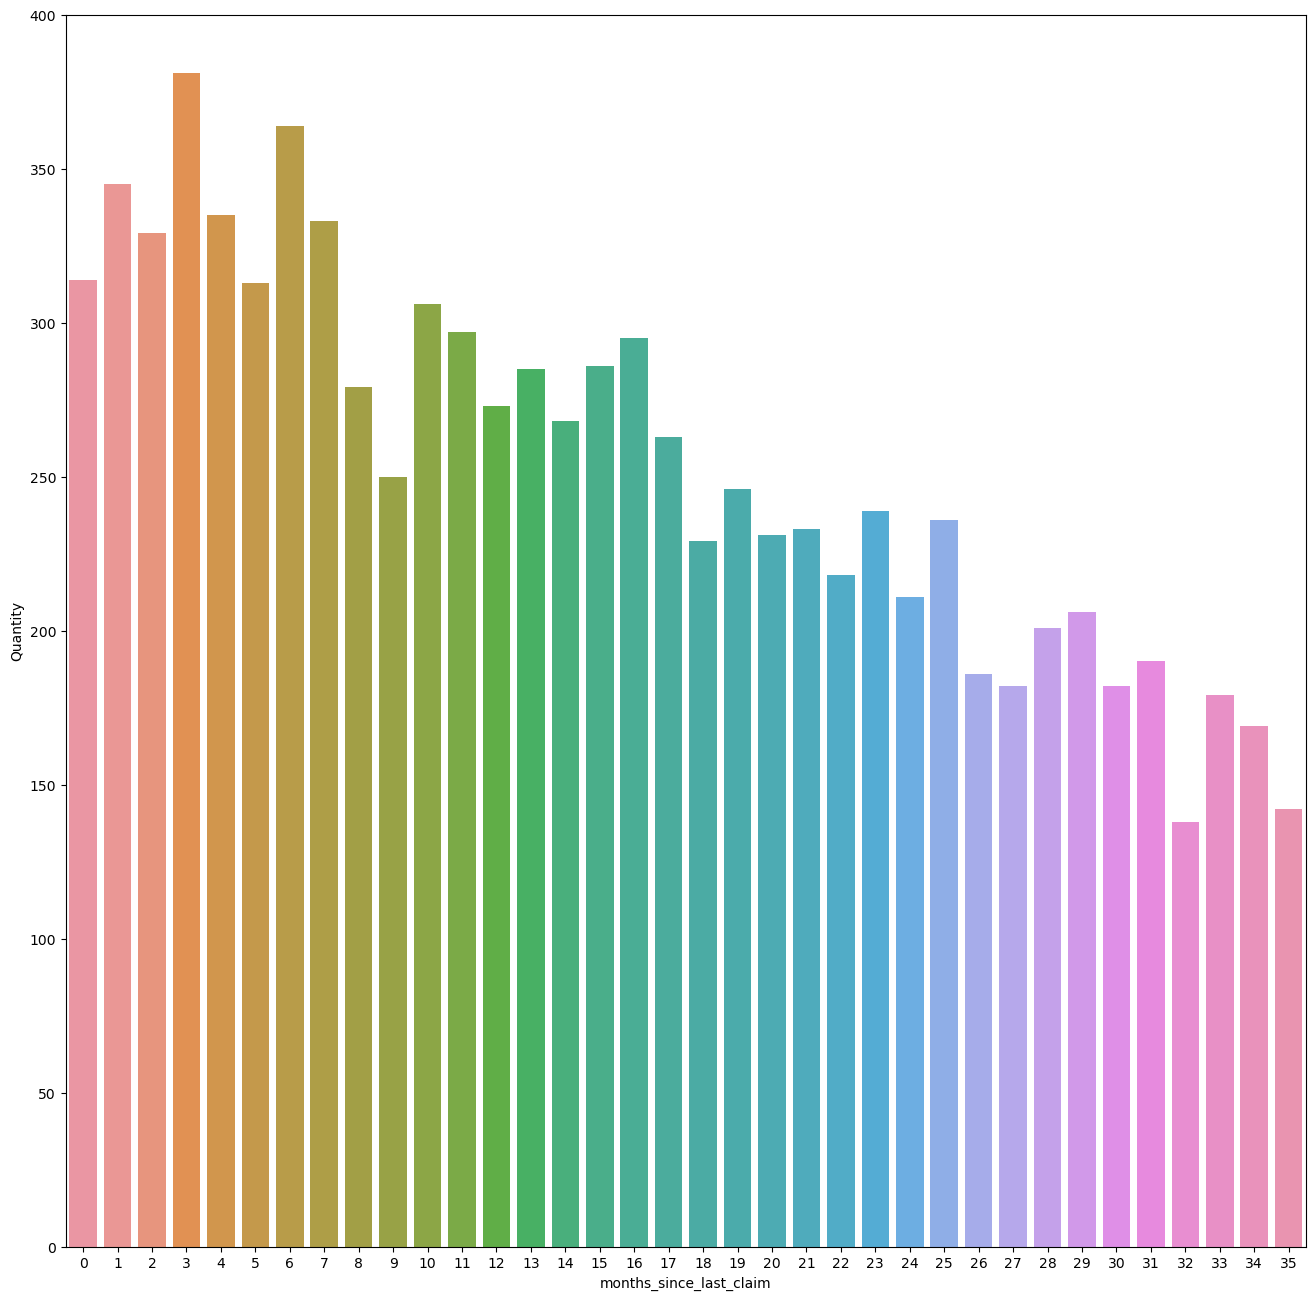

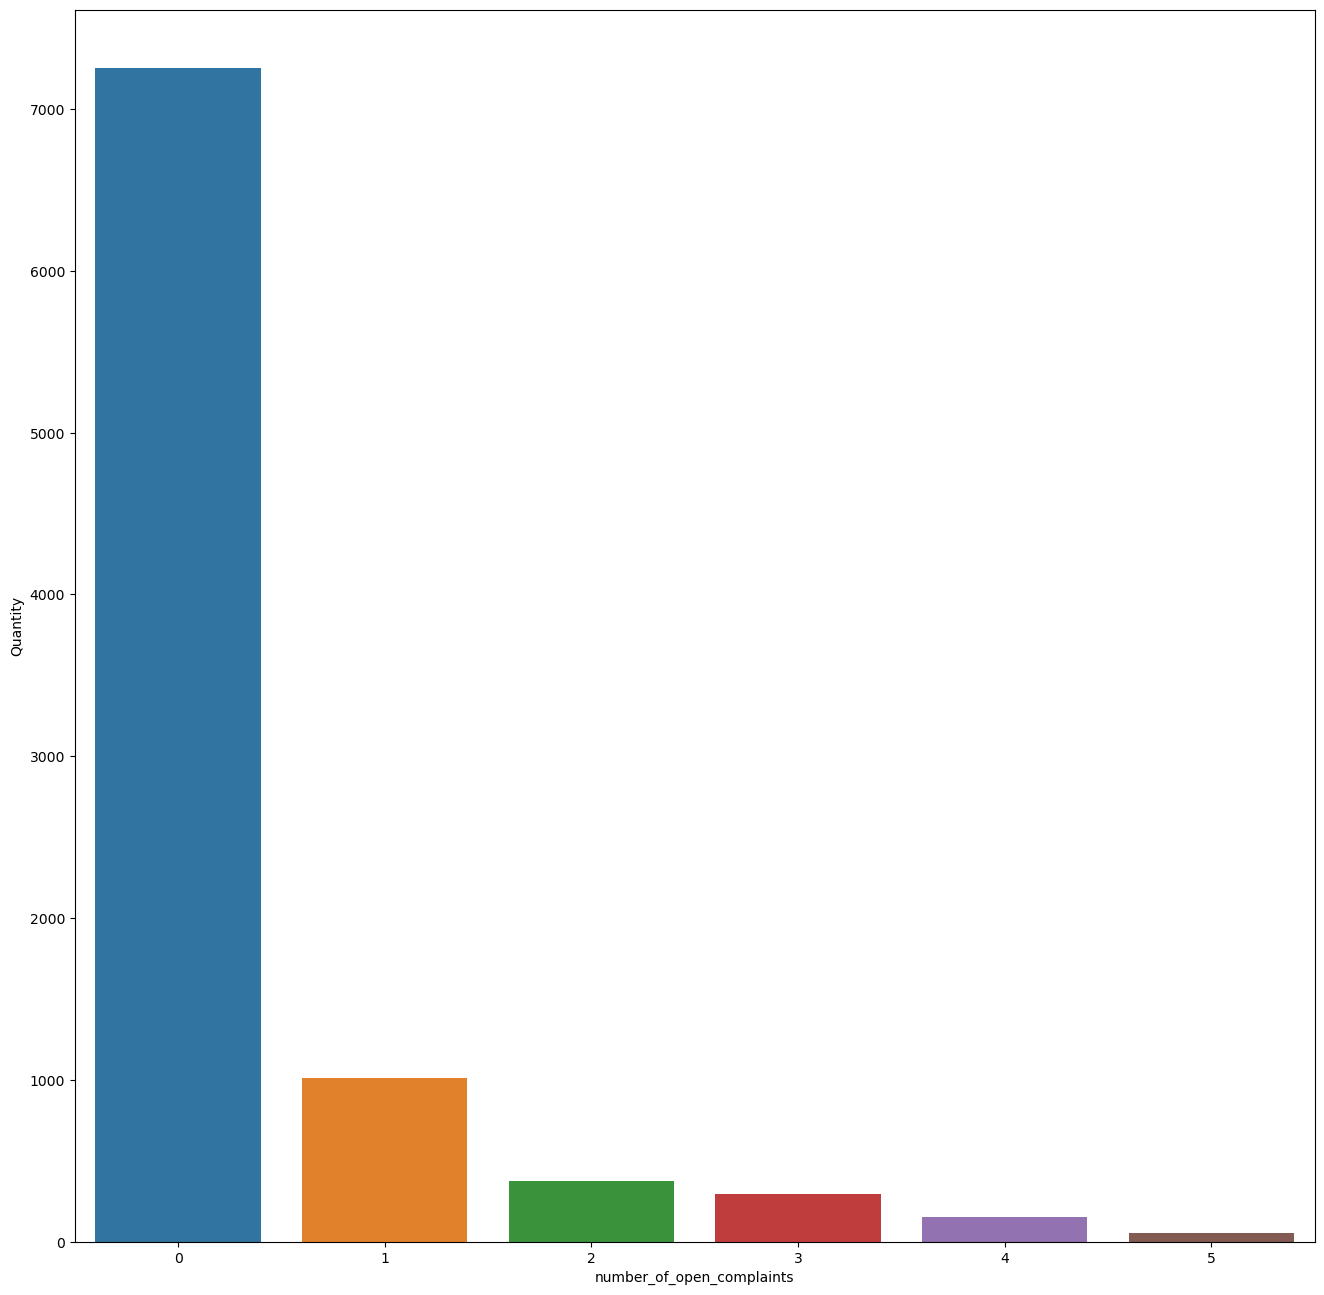

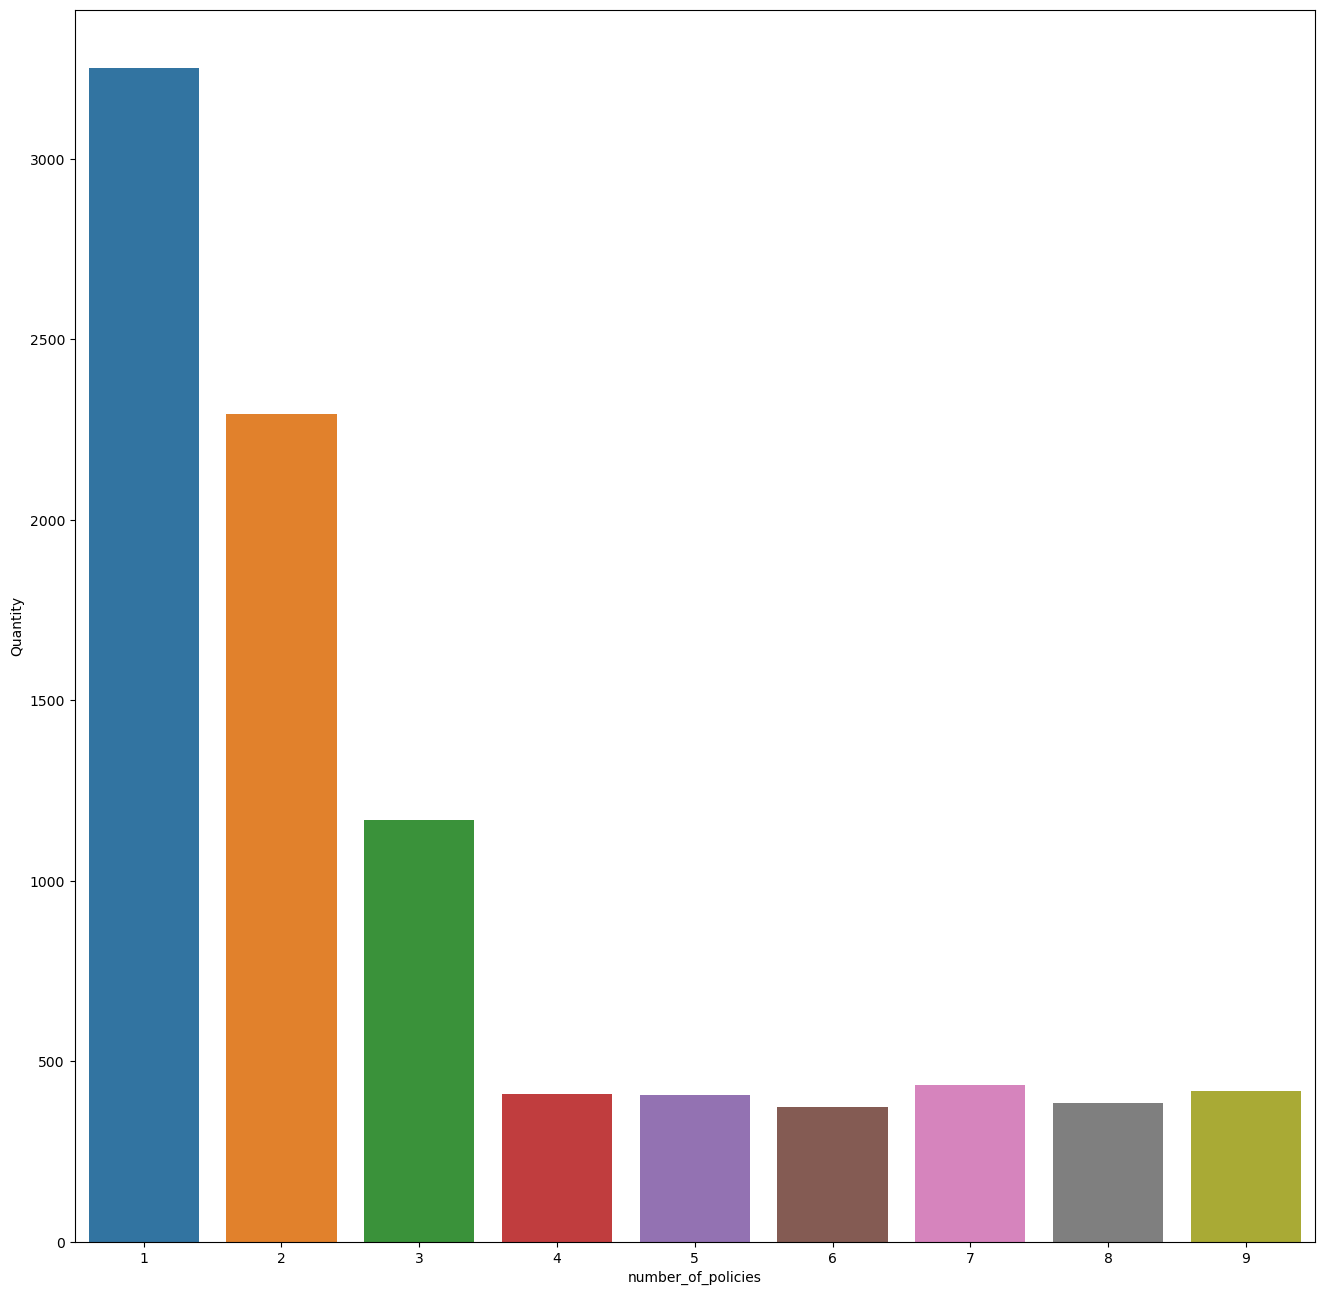

In [17]:
discrete_barplot(discrete_df)

## 12. Create a function to create a histogram for all the columns of the continuous_df using seaborn, and set the figuresize = (16,16)

In [18]:
def continuous_histogram(df:pd.DataFrame):
    for col in df.columns:
        fig, ax = plt.subplots(figsize=(16,16), sharey=True)
        sns.histplot(x=df[col].name, data = continuous_df)

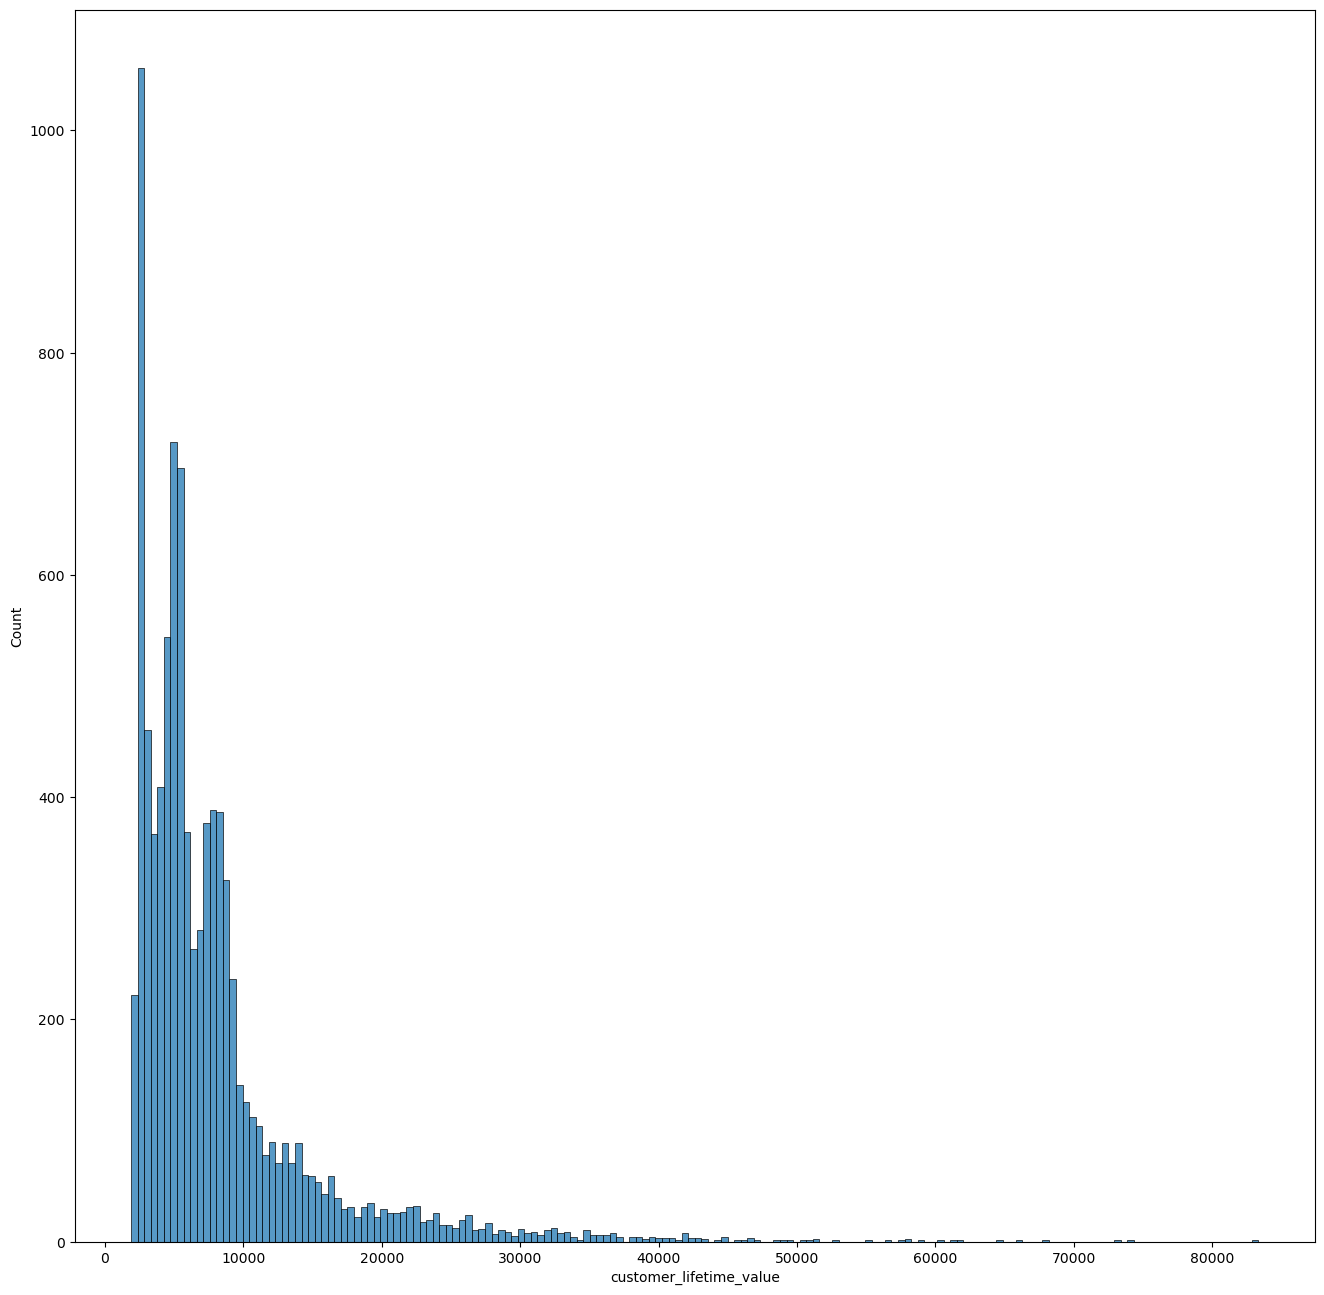

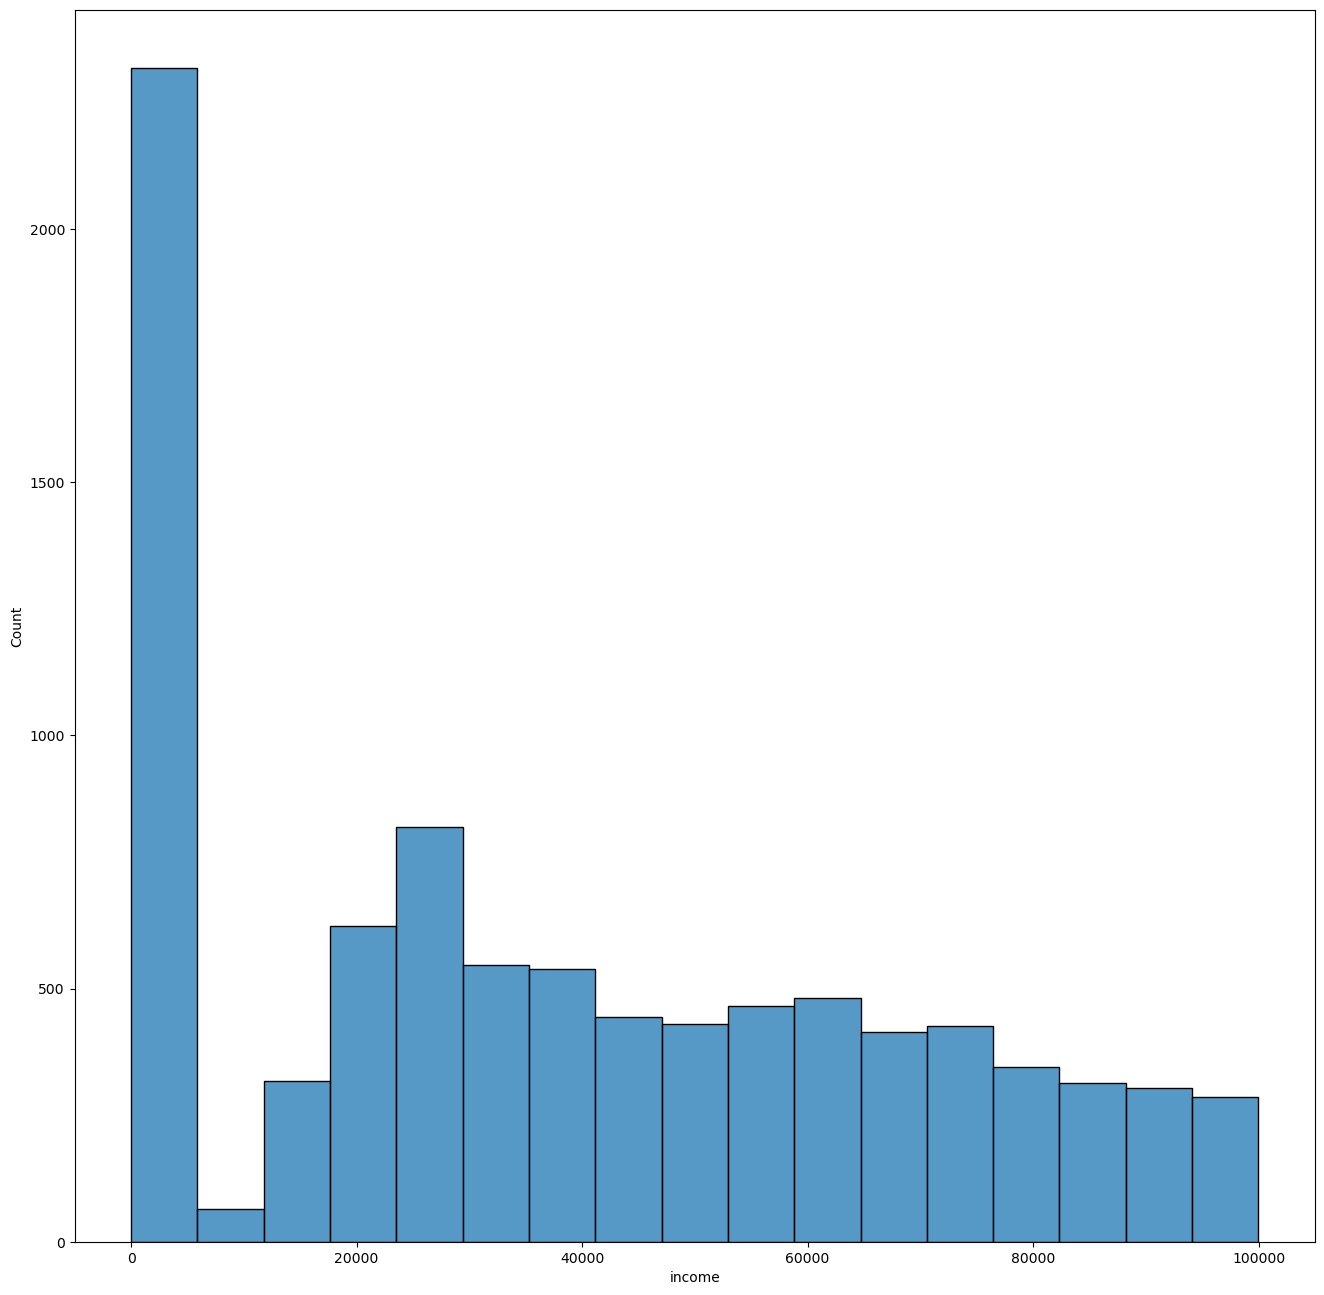

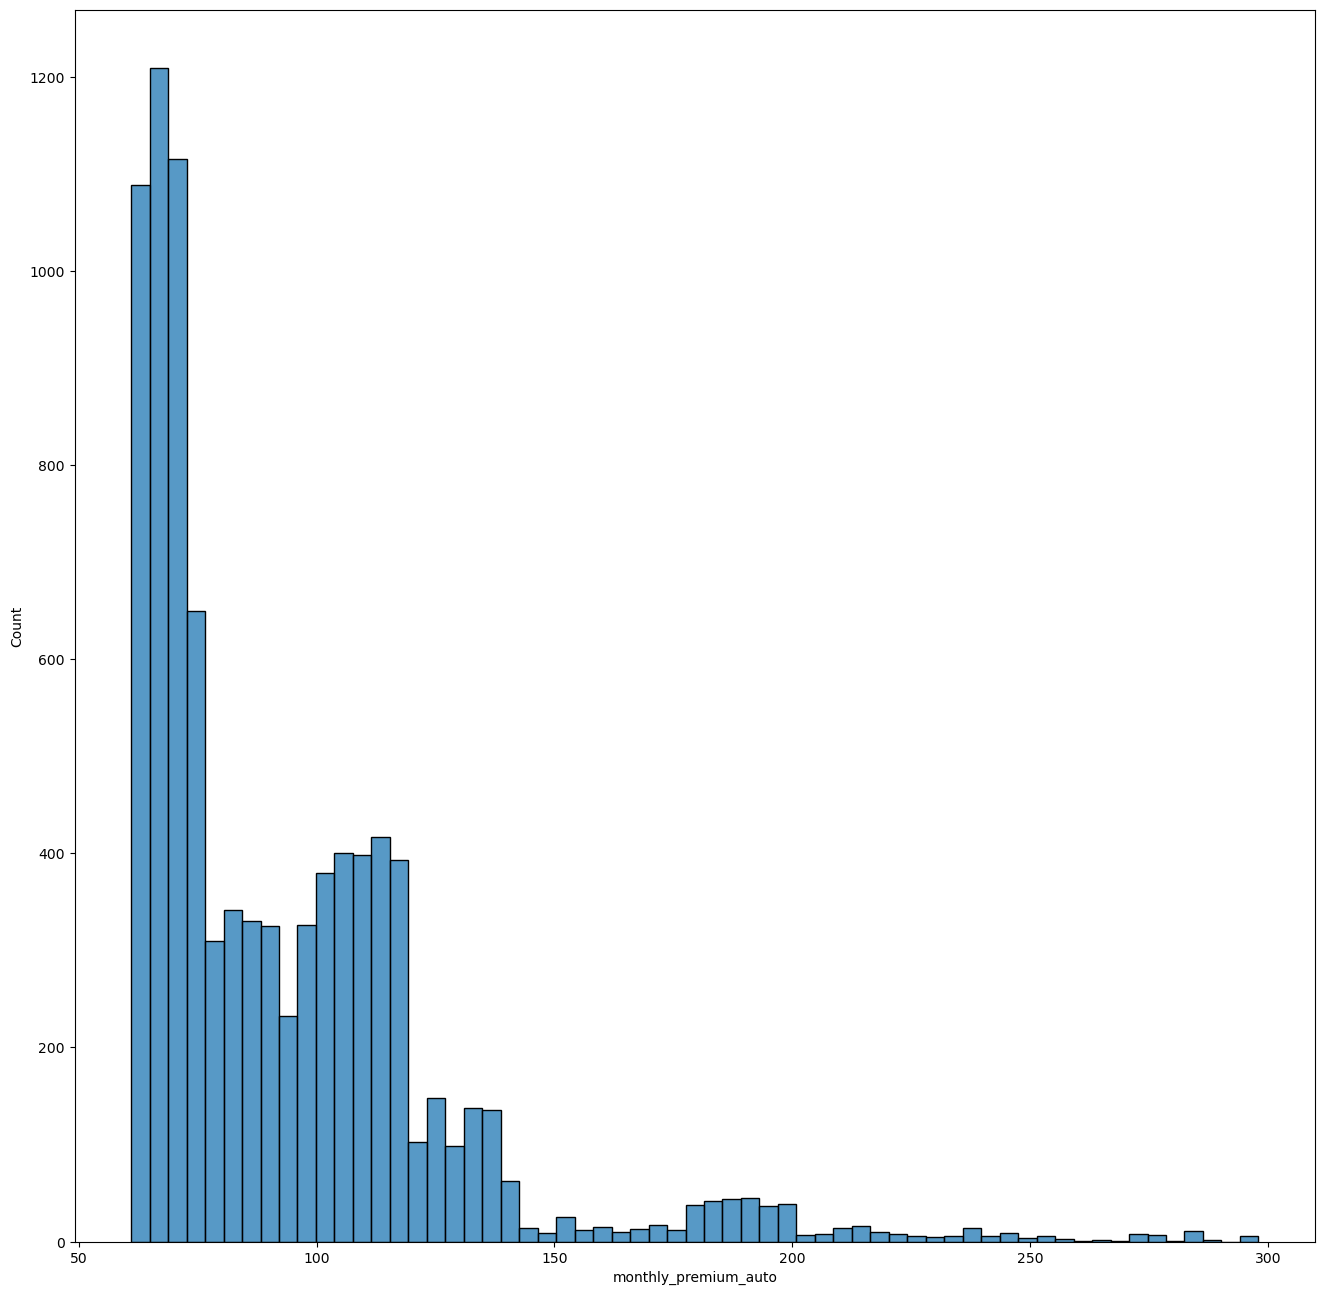

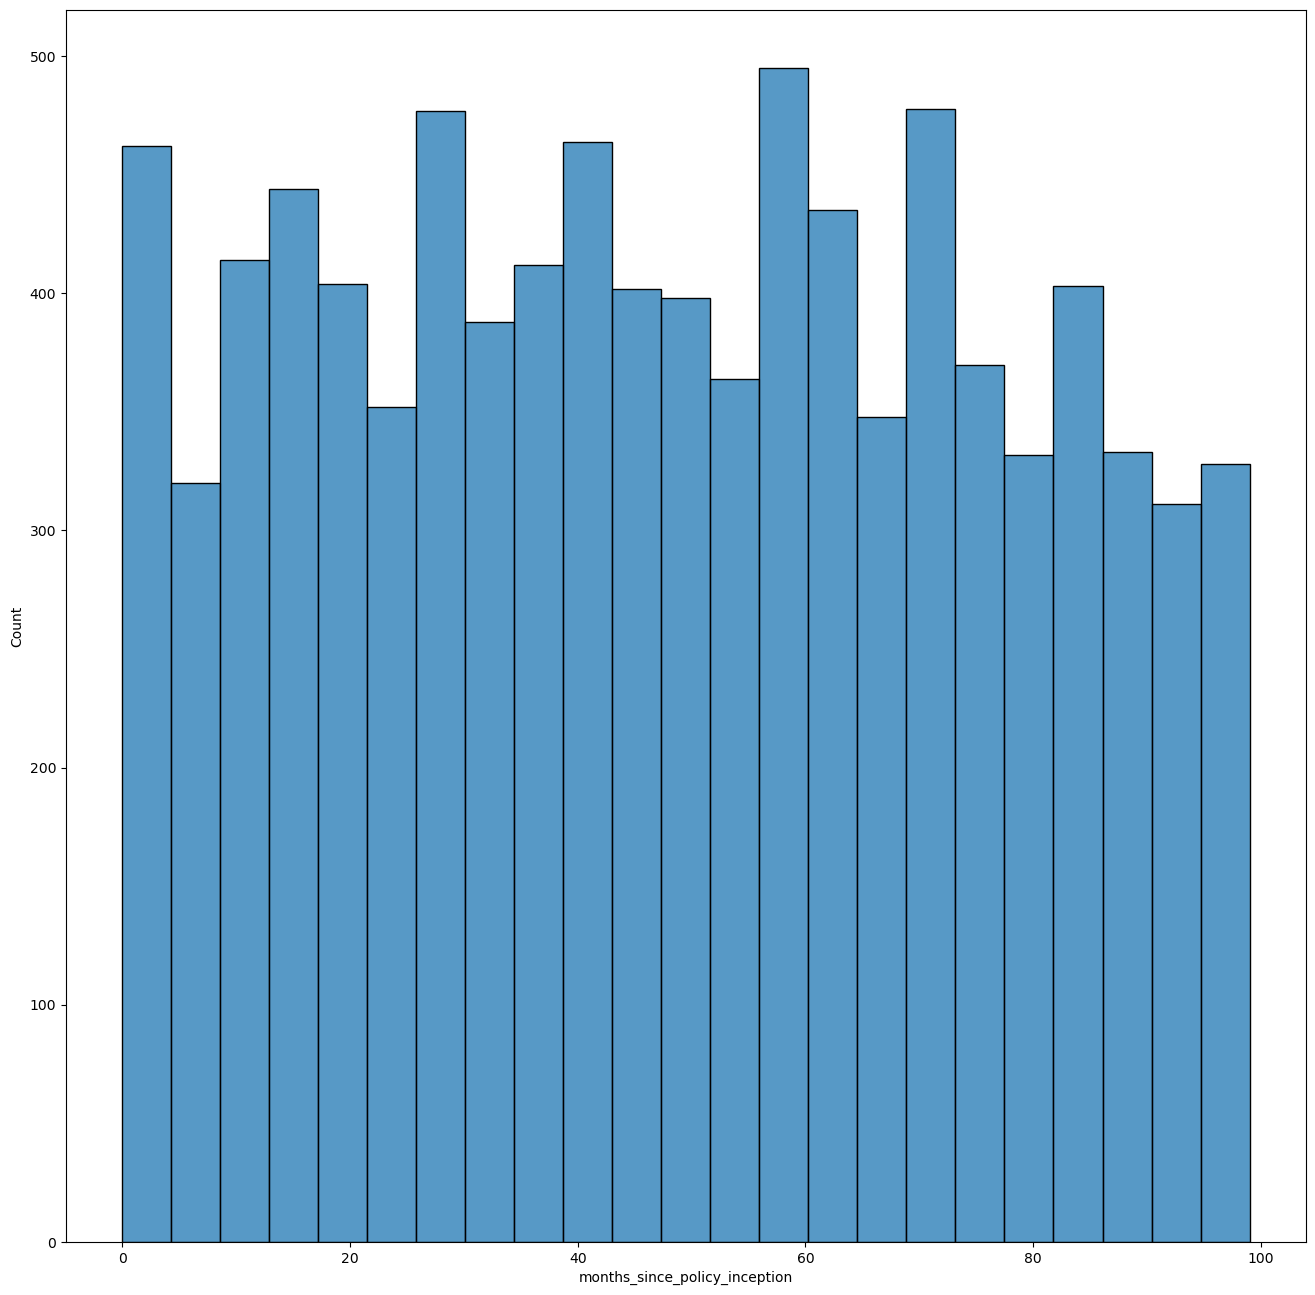

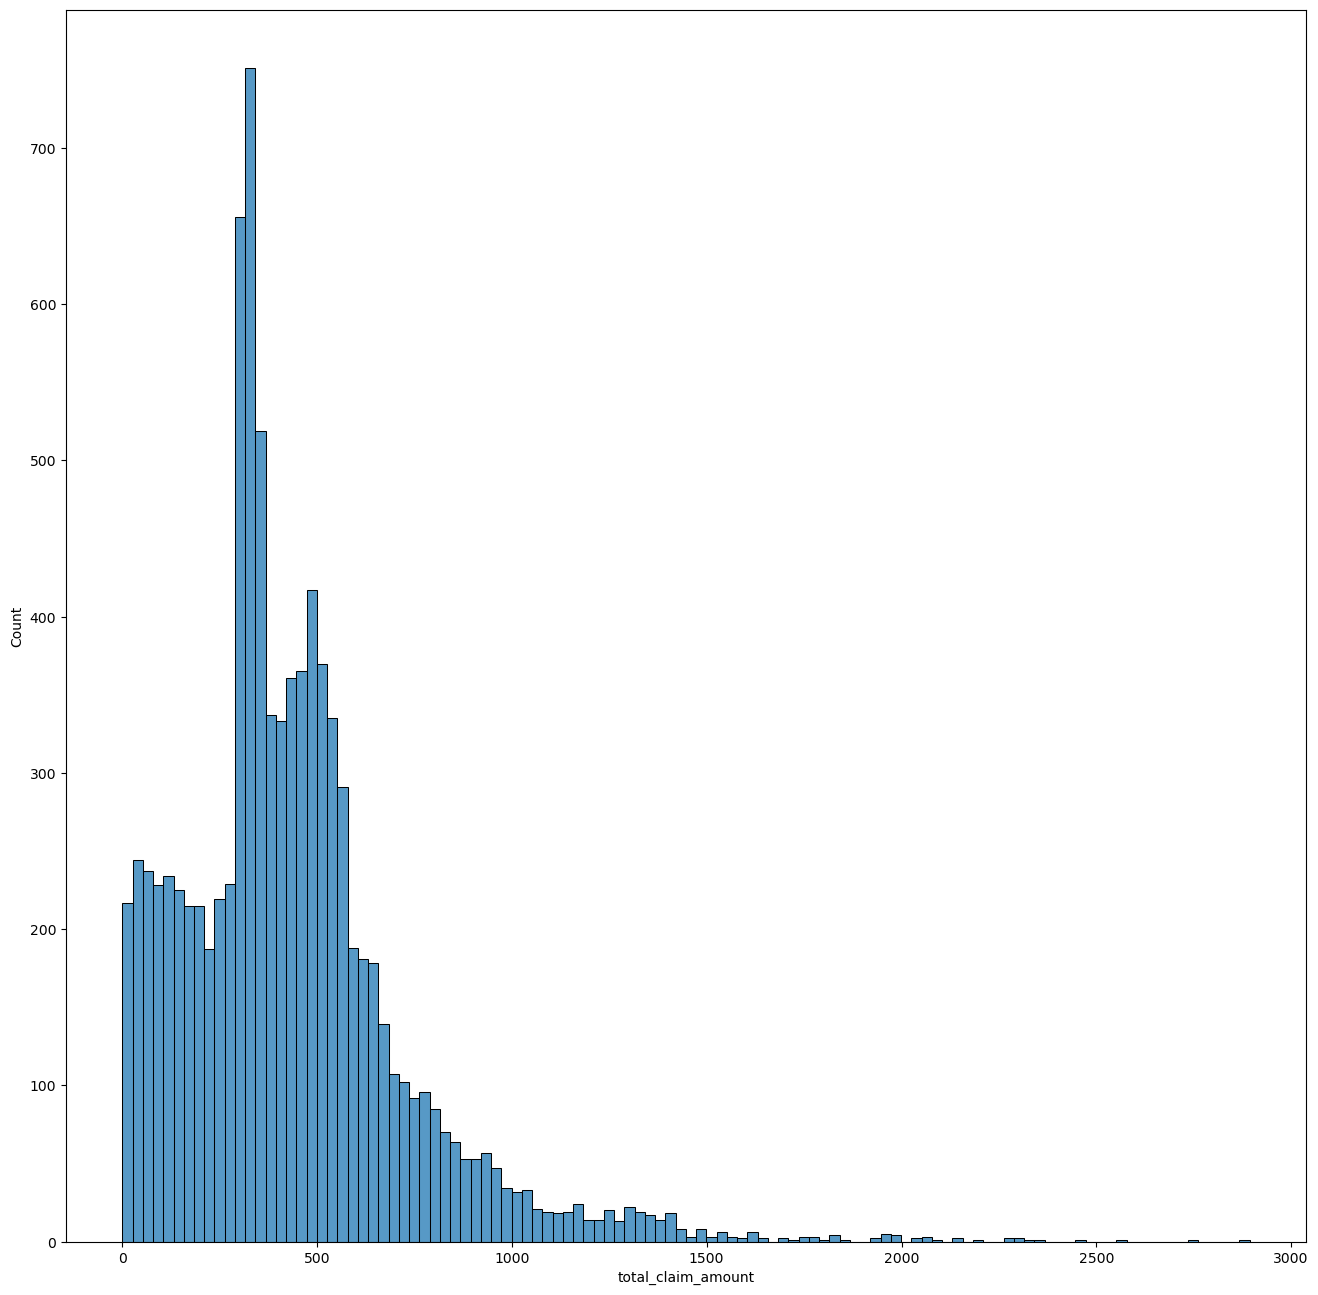

In [19]:
continuous_histogram(continuous_df)

## 13. According to the previous histogram plots, do you think that you will have to apply any transformation?

Yes, almost all the histograms have long tails on the right side of the plot, which signals skewness.

## 14. Look for outliers in the continuous variables that you have found. Hint: There was a good plot to do that. Define a function to create this kind of plot for the continuous_df

In [20]:
def continuous_outliers(df:pd.DataFrame):
    for col in df.columns:
        fig, ax = plt.subplots()
        sns.boxplot(data=continuous_df, x=df[col].name, ax=ax)

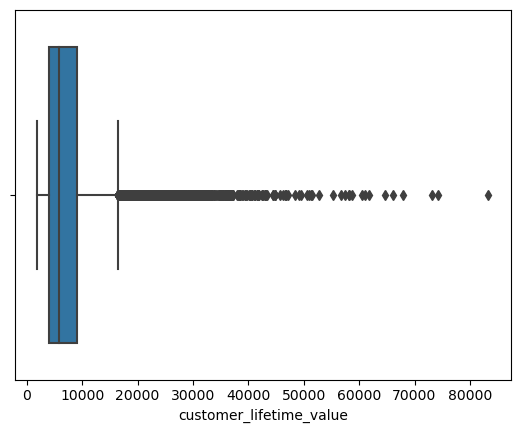

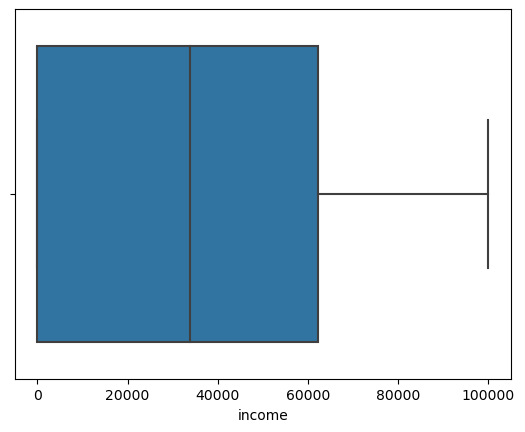

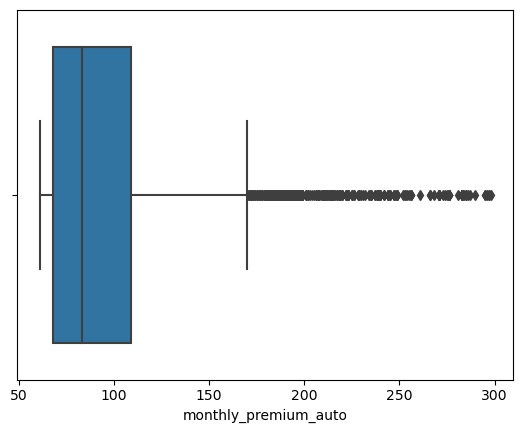

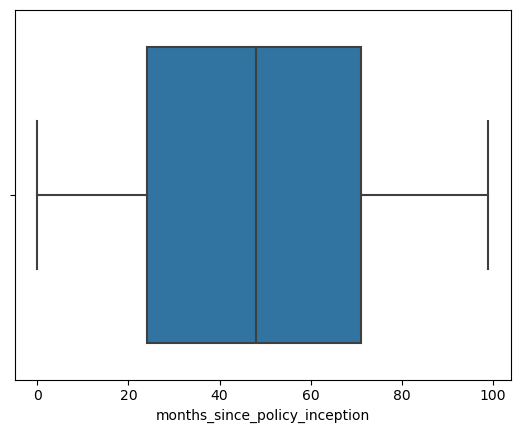

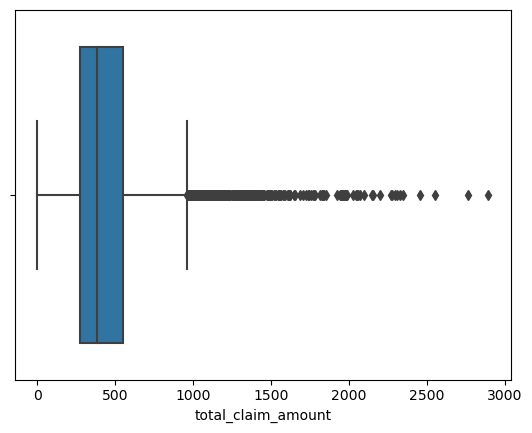

In [21]:
continuous_outliers(continuous_df)

# Lab | Cleaning categorical data

## 1. Define a function that given a pandas DataFrame as input creates a seaborn countplot of each categorical column. Make sure to sort the bars by frequency ie: the most frequent values should be placed first. Hint: use .value_counts(). In addition, if the amount of unique values of a categorical column (cardinality) is six or more, the corresponding countplot should have the bars placed on the y-axis instead of the x-axis

In [22]:
def categorical_countplot(df:pd.DataFrame):
    for col in df.columns:
        if df[col].nunique() < 6:
            fig, ax = plt.subplots()
            sns.countplot(x=df[col], order=df[col].value_counts().index)
        else:
            fig, ax = plt.subplots()
            sns.countplot(y=df[col], order=df[col].value_counts().index)

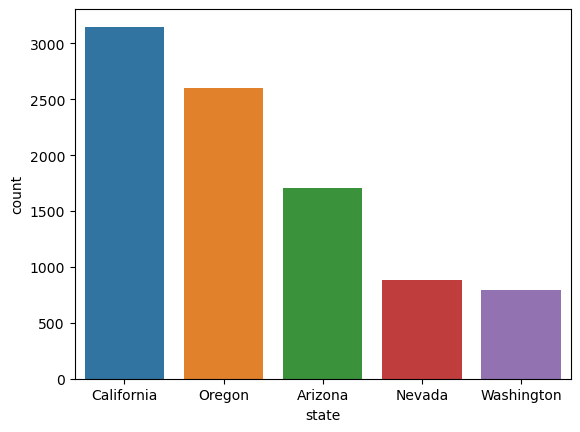

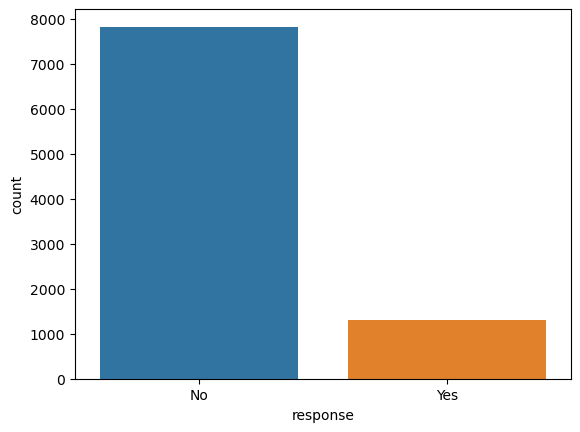

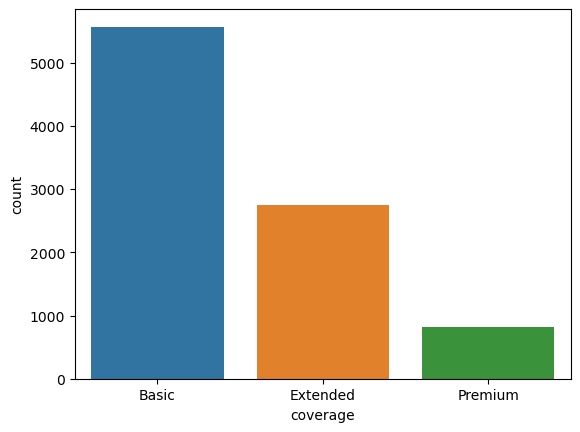

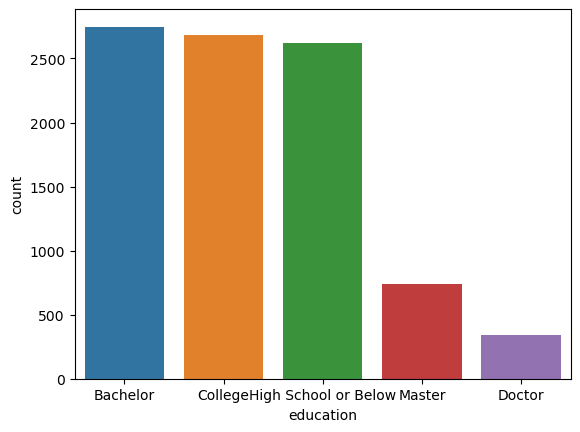

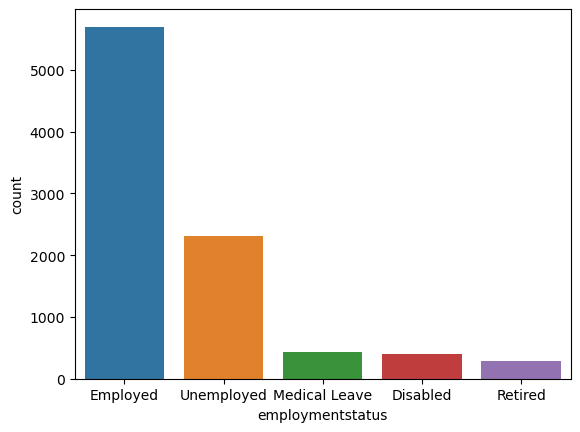

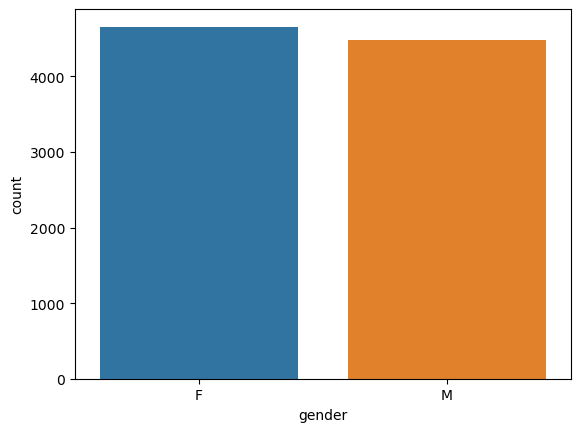

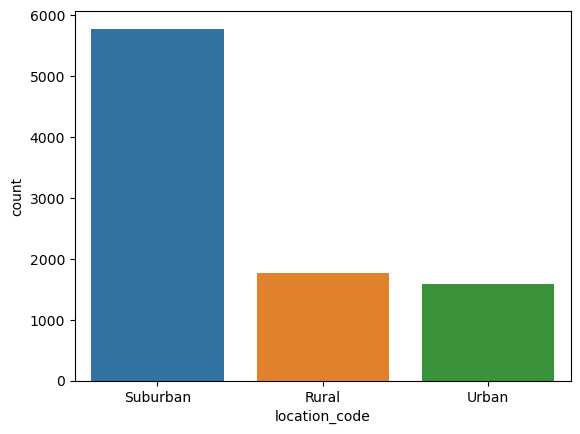

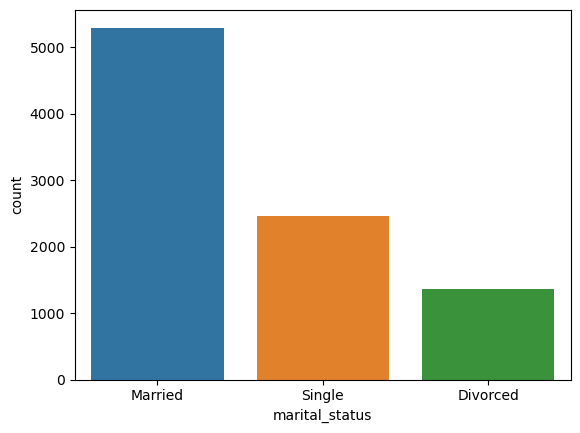

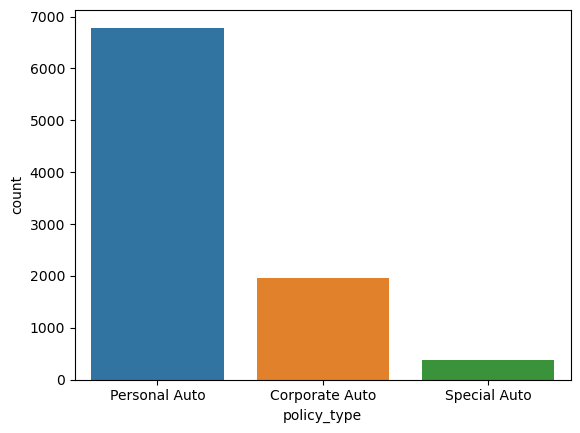

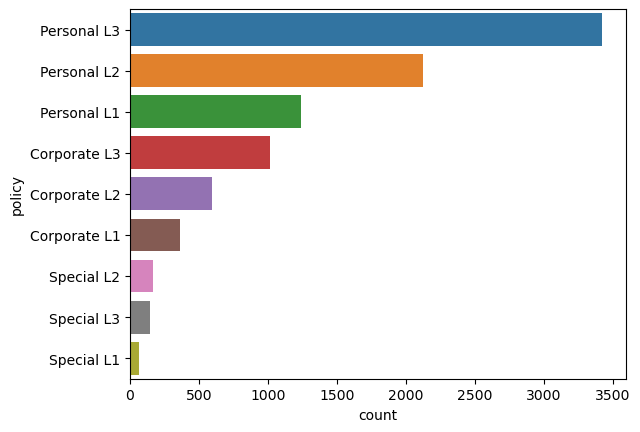

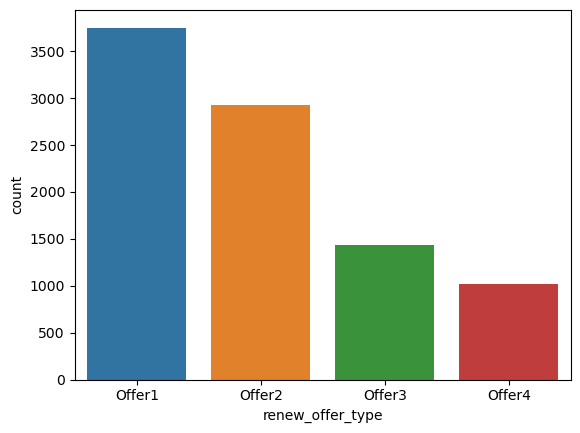

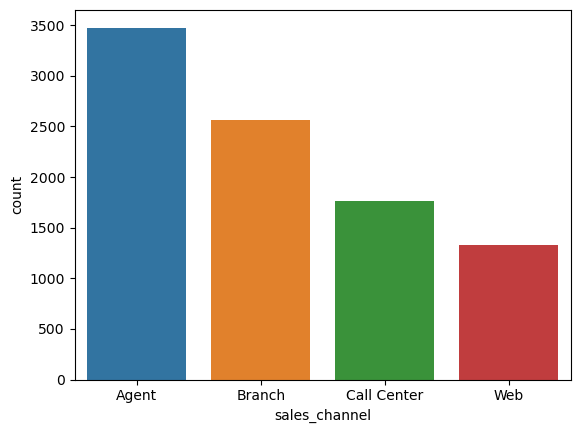

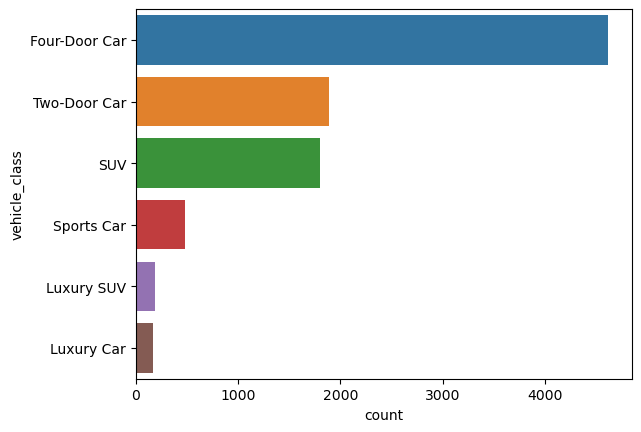

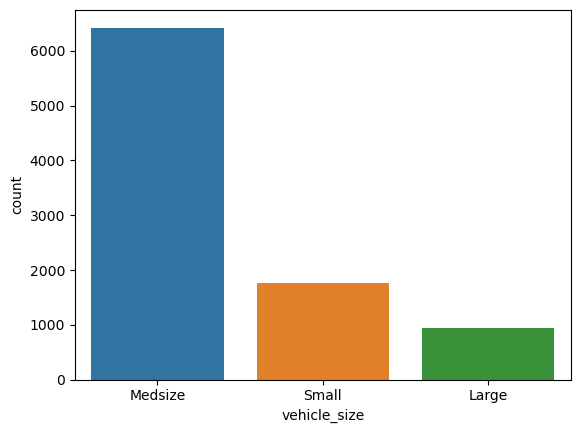

In [23]:
categorical_countplot(categorical)

## 2. policy_type and policy columns are redundant, and what's worse policy column has a lot of possible unique values (high cardinality) which will be problematic when they will be dummified with an OneHotEncoder because we will increase a lot the number of columns in the dataframe. Drop the column policy_type and transform the column policy to three possible values: L1, L2, and L3 using a function

Drop policy_type

In [24]:
categorical.drop('policy_type',axis=1,inplace=True)

In [25]:
def transform_column(df:pd.DataFrame, column: str):
    df[column] = df[column].apply(lambda x: x[-2:])
    return df

In [26]:
transform_column(categorical,'policy')

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,Employed,M,Urban,Married,L1,Offer2,Web,Four-Door Car,Medsize
9130,California,Yes,Extended,College,Employed,F,Suburban,Divorced,L3,Offer1,Branch,Four-Door Car,Medsize
9131,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,L2,Offer1,Branch,Four-Door Car,Medsize
9132,California,No,Extended,College,Employed,M,Suburban,Married,L2,Offer3,Branch,Four-Door Car,Large


## 3. Time dependency analysis. Use a seaborn line plot using the column effective_to_date to see if total_claim_amount is bigger at some specific dates. Use a figsize=(10,10)

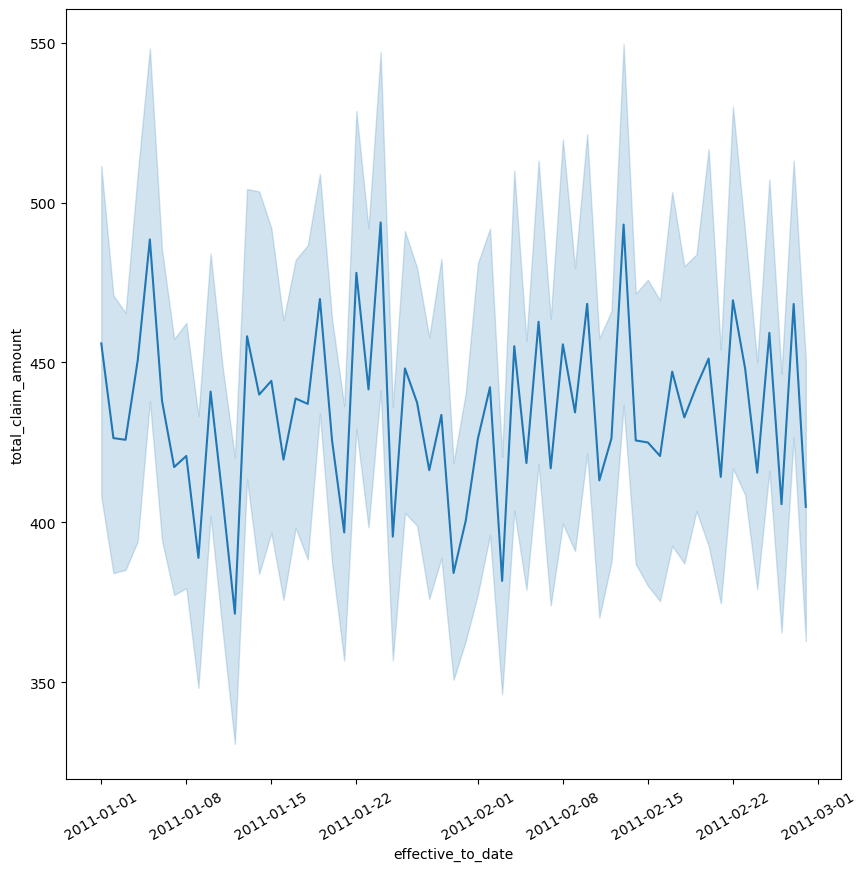

In [27]:
fig, ax = plt.subplots(figsize=(10,10))
sns.lineplot(x=customer_df['effective_to_date'], y=numerical['total_claim_amount'])
plt.xticks(rotation=30)
plt.show()

## 4. To continue the analysis define an empty pandas DataFrame, and add the following new columns:
## - day with the day number of effective_to_date
## - day_name with the day NAME of effective_to_date
## - week with the week of effective_to_date
## - month with the month NAME of effective_to_date
## - total_claim_amount with total_claim_amount

In [28]:
df = pd.DataFrame()
df['day'] = customer_df['effective_to_date'].apply(lambda x: x.day)
df['day_name'] = customer_df['effective_to_date'].apply(lambda x: x.strftime('%A'))
df['week'] = customer_df['effective_to_date'].apply(lambda x: x.week)
df['month'] = customer_df['effective_to_date'].apply(lambda x: x.strftime('%B'))
df['total_claim_amount'] = numerical['total_claim_amount']
df.head()

,day,day_name,week,month,total_claim_amount
0,24,Thursday,8,February,384.811147
1,31,Monday,5,January,1131.464935
2,19,Saturday,7,February,566.472247
3,20,Thursday,3,January,529.881344
4,3,Thursday,5,February,138.130879


## 5. Compute the total target column aggregated day_name rounded to two decimals and then reorder the index of the resulting pandas series using .reindex(index=list_of_correct_days)

In [29]:
list_of_correct_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_agg = df.groupby('day_name').agg({'total_claim_amount': 'sum'}).round(2).reindex(index=list_of_correct_days)
df_agg

,total_claim_amount
day_name,
Monday,655689.71
Tuesday,502518.93
Wednesday,541563.05
Thursday,541820.80
Friday,533658.79
Saturday,608060.10
Sunday,581655.66


## 6. Use a seaborn line plot to plot the previous series. Do you see some differences by day of the week?

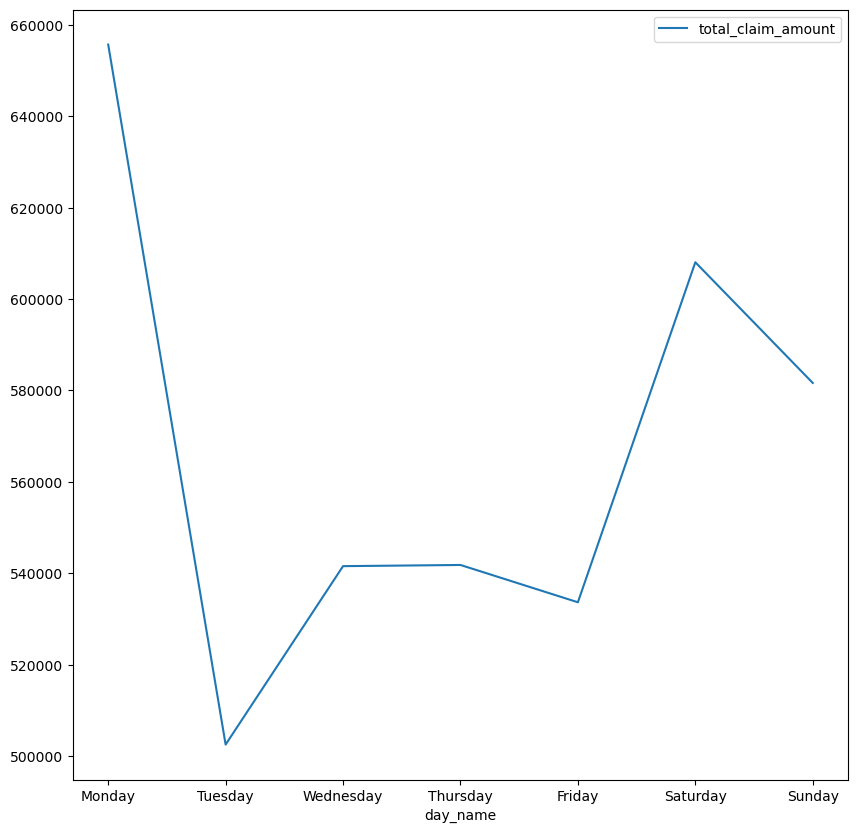

In [30]:
fig, ax = plt.subplots(figsize=(10,10))
sns.lineplot(df_agg)
plt.show()

Mondays, Saturdays and Sundays are the weekdays that have higher values for total_claim_amount, while Tuesdays have the lowest.

## 7. Get the total number of claims by day of the week name and then reorder the index of the resulting pandas series using .reindex(index=list_of_correct_values)

In [31]:
df_agg2 = df.groupby('day_name').agg({'total_claim_amount': 'count'}).reindex(index=list_of_correct_days)
df_agg2

,total_claim_amount
day_name,
Monday,1530
Tuesday,1162
Wednesday,1221
Thursday,1249
Friday,1245
Saturday,1397
Sunday,1330


## 8. Get the median "target" by day of the week name and then sort the resulting values in descending order using .sort_values()

In [32]:
df_agg3 = df.groupby('day_name').agg({'total_claim_amount': 'median'}).sort_values(by='total_claim_amount', ascending=False)
df_agg3

,total_claim_amount
day_name,
Thursday,395.328407
Wednesday,392.235698
Monday,385.735705
Sunday,383.721164
Saturday,379.200000
Tuesday,378.490829
Friday,371.803029


## 9. Plot the median "target" by day of the week name using a seaborn barplot

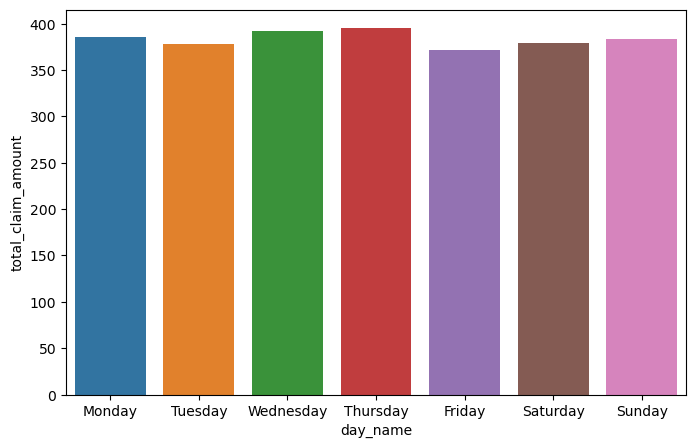

In [33]:
df_agg4 = df_agg3.reindex(index=list_of_correct_days).reset_index()
fig, ax = plt.subplots(figsize=(8, 5))
sns.barplot(x= df_agg4['day_name'], y=df_agg4['total_claim_amount'])
plt.show()

## 10. What can you conclude from this analysis?

There is no significant difference between the total claim amount in different weekdays.

## 11. Compute the total target column aggregated month rounded to two decimals and then reorder the index of the resulting pandas series using .reindex(index=list_of_correct_values)

In [34]:
df['month'].value_counts()

January     4898
February    4236
Name: month, dtype: int64

In [35]:
list_of_correct_values = ['January', 'February']
df_agg5 = df.groupby('month').agg({'total_claim_amount': 'sum'}).round(2).reindex(index=list_of_correct_values)
df_agg5

,total_claim_amount
month,
January,2117142.86
February,1847824.19


## 12. Can you do a monthly analysis given the output of the previous series? Why?

No, it's not possible to do a monthly analysis because there are only two months.

## 13. Define a function to remove the outliers of a numerical continuous column depending if a value is bigger or smaller than a given amount of standard deviations of the mean (thr=3)

In [36]:
def remove_outliers(df: pd.DataFrame, column: str, thr=3):
    column_mean = df[column].mean()
    column_std = df[column].std()
    df = df[(df[column] > (column_mean - thr*column_std)) & (df[column] < (column_mean + thr*column_std))]
    return df

## 14. Use the previous function to remove the outliers of continuous data and to generate a continuous_clean_df

In [37]:
continuous_clean_df = pd.DataFrame()
for col in continuous_df.columns:
    continuous_clean_df = remove_outliers(continuous_df, col)
continuous_clean_df.reset_index(drop=True)

,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,total_claim_amount
0,2763.519279,56274,69,5,384.811147
1,6979.535903,0,94,42,1131.464935
2,12887.431650,48767,108,38,566.472247
3,7645.861827,0,106,65,529.881344
4,2813.692575,43836,73,44,138.130879
...,...,...,...,...,...
8971,23405.987980,71941,73,89,198.234764
8972,3096.511217,21604,79,28,379.200000
8973,8163.890428,0,85,37,790.784983
8974,7524.442436,21941,96,3,691.200000


## 15. Concatenate the continuous_cleaned_df, discrete_df, categorical_df, and the relevant column of time_df. After removing outliers the continuous_cleaned dataframe will have fewer rows (when you concat the individual dataframes using pd.concat()) the resulting dataframe will have NaN's because of the different sizes of each dataframe. Use pd.dropna() and .reset_index() to fix the final dataframe

In [38]:
time_df = df.drop('total_claim_amount', axis=1)

In [39]:
clean_customer_df = pd.concat([continuous_clean_df, discrete_df, categorical, time_df], axis=1).dropna().reset_index(drop=True)
clean_customer_df

,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,total_claim_amount,months_since_last_claim,number_of_open_complaints,number_of_policies,state,response,...,marital_status,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,day,day_name,week,month
0,2763.519279,56274.0,69.0,5.0,384.811147,32,0,1,Washington,No,...,Married,L3,Offer1,Agent,Two-Door Car,Medsize,24,Thursday,8,February
1,6979.535903,0.0,94.0,42.0,1131.464935,13,0,8,Arizona,No,...,Single,L3,Offer3,Agent,Four-Door Car,Medsize,31,Monday,5,January
2,12887.431650,48767.0,108.0,38.0,566.472247,18,0,2,Nevada,No,...,Married,L3,Offer1,Agent,Two-Door Car,Medsize,19,Saturday,7,February
3,7645.861827,0.0,106.0,65.0,529.881344,18,0,7,California,No,...,Married,L2,Offer1,Call Center,SUV,Medsize,20,Thursday,3,January
4,2813.692575,43836.0,73.0,44.0,138.130879,12,0,1,Washington,No,...,Single,L1,Offer1,Agent,Four-Door Car,Medsize,3,Thursday,5,February
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8971,23405.987980,71941.0,73.0,89.0,198.234764,18,0,2,California,No,...,Married,L1,Offer2,Web,Four-Door Car,Medsize,10,Thursday,6,February
8972,3096.511217,21604.0,79.0,28.0,379.200000,14,0,1,California,Yes,...,Divorced,L3,Offer1,Branch,Four-Door Car,Medsize,12,Saturday,6,February
8973,8163.890428,0.0,85.0,37.0,790.784983,9,3,2,California,No,...,Single,L2,Offer1,Branch,Four-Door Car,Medsize,6,Sunday,5,February
8974,7524.442436,21941.0,96.0,3.0,691.200000,34,0,3,California,No,...,Married,L2,Offer3,Branch,Four-Door Car,Large,3,Thursday,5,February


## 16. Reorder the columns of the dataframe to place 'total_claim_amount' as the last column

In [40]:
clean_customer_df.columns

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_policy_inception', 'total_claim_amount',
       'months_since_last_claim', 'number_of_open_complaints',
       'number_of_policies', 'state', 'response', 'coverage', 'education',
       'employmentstatus', 'gender', 'location_code', 'marital_status',
       'policy', 'renew_offer_type', 'sales_channel', 'vehicle_class',
       'vehicle_size', 'day', 'day_name', 'week', 'month'],
      dtype='object')

In [41]:
clean_customer_df = clean_customer_df[['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_policy_inception',
       'months_since_last_claim', 'number_of_open_complaints',
       'number_of_policies', 'state', 'response', 'coverage', 'education',
       'employmentstatus', 'gender', 'location_code', 'marital_status',
       'policy', 'renew_offer_type', 'sales_channel', 'vehicle_class',
       'vehicle_size', 'day', 'day_name', 'week', 'month','total_claim_amount']]
clean_customer_df.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,months_since_last_claim,number_of_open_complaints,number_of_policies,state,response,coverage,...,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,day,day_name,week,month,total_claim_amount
0,2763.519279,56274.0,69.0,5.0,32,0,1,Washington,No,Basic,...,L3,Offer1,Agent,Two-Door Car,Medsize,24,Thursday,8,February,384.811147
1,6979.535903,0.0,94.0,42.0,13,0,8,Arizona,No,Extended,...,L3,Offer3,Agent,Four-Door Car,Medsize,31,Monday,5,January,1131.464935
2,12887.431650,48767.0,108.0,38.0,18,0,2,Nevada,No,Premium,...,L3,Offer1,Agent,Two-Door Car,Medsize,19,Saturday,7,February,566.472247
3,7645.861827,0.0,106.0,65.0,18,0,7,California,No,Basic,...,L2,Offer1,Call Center,SUV,Medsize,20,Thursday,3,January,529.881344
4,2813.692575,43836.0,73.0,44.0,12,0,1,Washington,No,Basic,...,L1,Offer1,Agent,Four-Door Car,Medsize,3,Thursday,5,February,138.130879


## 17. Turn the response column values into (Yes=1/No=0)

In [42]:
clean_customer_df['response'] = clean_customer_df['response'].replace(['Yes','No'],[1,0])
clean_customer_df['response'].value_counts()

0    7680
1    1296
Name: response, dtype: int64

## 18. Reduce the class imbalance in education by grouping together ["Master","Doctor"] into "Graduate" while keeping the other possible values as they are. In this way, you will reduce a bit the class imbalance at the price of losing a level of detail

In [43]:
clean_customer_df['education'] = clean_customer_df['education'].replace(['Master','Doctor'],'Graduate')
clean_customer_df['education'].value_counts()

Bachelor                2704
College                 2639
High School or Below    2554
Graduate                1079
Name: education, dtype: int64

## 19. Reduce the class imbalance of the employmentstatus column grouping together ["Medical Leave", "Disabled", "Retired"] into "Inactive" while keeping the other possible values as they are. In this way, you will reduce a bit the class imbalance at the price of losing a level of detail

In [44]:
clean_customer_df['employmentstatus'] = clean_customer_df['employmentstatus'].replace(['Medical Leave','Disabled', 'Retired'],'Inactive')
clean_customer_df['employmentstatus'].value_counts()

Employed      5651
Unemployed    2216
Inactive      1109
Name: employmentstatus, dtype: int64

## 20. Deal with column Gender turning the values into (1/0)

In [45]:
clean_customer_df['gender'] = clean_customer_df['gender'].replace(['M','F'],[0,1])
clean_customer_df['gender'].value_counts()

1    4600
0    4376
Name: gender, dtype: int64

## 21. Now, deal with vehicle_class grouping together "Sports Car", "Luxury SUV", and "Luxury Car" into a common group called Luxury leaving the other values as they are. In this way, you will reduce a bit the class imbalance at the price of losing a level of detail

In [46]:
clean_customer_df['vehicle_class'] = clean_customer_df['vehicle_class'].replace(['Sports Car','Luxury SUV', 'Luxury Car'],'Luxury')
clean_customer_df['vehicle_class'].value_counts()

Four-Door Car    4619
Two-Door Car     1886
SUV              1765
Luxury            706
Name: vehicle_class, dtype: int64

## 22. Now it's time to deal with the categorical ordinal columns, assigning a numerical value to each unique value respecting the ìmplicit ordering`. Encode the coverage: "Premium" > "Extended" > "Basic"

In [47]:
clean_customer_df['coverage'] = clean_customer_df['coverage'].replace(['Basic','Extended', 'Premium'],[0,1,2])
clean_customer_df['coverage'].value_counts()

0    5507
1    2699
2     770
Name: coverage, dtype: int64

## 23. Encode the column employmentstatus as: "Employed" > "Inactive" > "Unemployed"

In [48]:
clean_customer_df['employmentstatus'] = clean_customer_df['employmentstatus'].replace(['Unemployed','Inactive', 'Employed'],[0,1,2])
clean_customer_df['employmentstatus'].value_counts()

2    5651
0    2216
1    1109
Name: employmentstatus, dtype: int64

## 24. Encode the column location_code as: "Urban" > "Suburban" > "Rural"

In [49]:
clean_customer_df['location_code'] = clean_customer_df['location_code'].replace(['Rural','Suburban', 'Urban'],[0,1,2])
clean_customer_df['location_code'].value_counts()

1    5621
0    1773
2    1582
Name: location_code, dtype: int64

## 25. Encode the column vehicle_size as: "Large" > "Medsize" > "Small"

In [50]:
clean_customer_df['vehicle_size'] = clean_customer_df['vehicle_size'].replace(['Small','Medsize', 'Large'],[0,1,2])
clean_customer_df['vehicle_size'].value_counts()

1    6315
0    1736
2     925
Name: vehicle_size, dtype: int64

## 26. Get a dataframe with the categorical nominal columns

In [51]:
categorical_nominal = clean_customer_df[['state', 'education', 'marital_status', 'policy', 'renew_offer_type', 'sales_channel', 'vehicle_class']]
categorical_nominal.head()

,state,education,marital_status,policy,renew_offer_type,sales_channel,vehicle_class
0,Washington,Bachelor,Married,L3,Offer1,Agent,Two-Door Car
1,Arizona,Bachelor,Single,L3,Offer3,Agent,Four-Door Car
2,Nevada,Bachelor,Married,L3,Offer1,Agent,Two-Door Car
3,California,Bachelor,Married,L2,Offer1,Call Center,SUV
4,Washington,Bachelor,Single,L1,Offer1,Agent,Four-Door Car


## 27. Create a list of named levels which that has as many elements as categorical nominal columns. Each element must be another list with all the possible unique values of the corresponding categorical nominal column: ie:

levels = [ [col1_value1, col1_value2,...], [col2_value1, col2_value2,...], ...]

In [52]:
levels = []
for col in categorical_nominal.columns:
    values = categorical_nominal[col].unique().tolist()
    levels.append(values)
levels

[['Washington', 'Arizona', 'Nevada', 'California', 'Oregon'],
 ['Bachelor', 'College', 'Graduate', 'High School or Below'],
 ['Married', 'Single', 'Divorced'],
 ['L3', 'L2', 'L1'],
 ['Offer1', 'Offer3', 'Offer2', 'Offer4'],
 ['Agent', 'Call Center', 'Web', 'Branch'],
 ['Two-Door Car', 'Four-Door Car', 'SUV', 'Luxury']]

## 28. Instantiate an sklearn OneHotEncoder with drop set to first and categories to levels

In [53]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(categories = levels, drop='first')

encoder.fit(categorical_nominal)


categoricals_nominal_encoded = encoder.transform(categorical_nominal).toarray()

categoricals_nominal_encoded_df = pd.DataFrame(categoricals_nominal_encoded, columns = encoder.get_feature_names_out(), 
                                               index=categorical_nominal.index)

categoricals_nominal_encoded_df.head()

,state_Arizona,state_Nevada,state_California,state_Oregon,education_College,education_Graduate,education_High School or Below,marital_status_Single,marital_status_Divorced,policy_L2,policy_L1,renew_offer_type_Offer3,renew_offer_type_Offer2,renew_offer_type_Offer4,sales_channel_Call Center,sales_channel_Web,sales_channel_Branch,vehicle_class_Four-Door Car,vehicle_class_SUV,vehicle_class_Luxury
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
